In [37]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# data: 1. fix dictionary data about critics 
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
'You, Me and Dupree': 3.5},
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
'The Night Listener': 4.5, 'Superman Returns': 4.0,
'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
'You, Me and Dupree': 2.0},
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

In [39]:
#  what score Lisa Rose gave to the movie Lady in the Water
critics['Lisa Rose']['Lady in the Water']

2.5

In [40]:
# All rating provided by Toby
critics['Toby']

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [41]:
# return a distance-based similarity score for person 1 and person 2 
# based on Euclidean distance
def sum_distance(prefs, person1, person2):
    si={}
    # get list of common items
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item] =1
    if len(si)==0:
        return 0
    sum_of_square=sum([pow(prefs[person1][item]-prefs[person2][item],2) for item in si])
    return 1/(1+sum_of_square)
            
            
sum_distance(critics, 'Lisa Rose', 'Gene Seymour')


0.14814814814814814

In [42]:
# pearson correlation
from scipy.stats.stats import pearsonr
def sim_pearson_fancy(prefs,p1,p2):
    si={}
    for item in prefs[p1]:
        if item in prefs[p2]: si[item]=1

    if len(si)==0: return 0
    else:
        si_1 = [prefs[p1][it] for it in si]
        si_2 = [prefs[p2][it] for it in si]
        return pearsonr(si_1, si_2)[0]
    
sim_pearson_fancy(critics,'Lisa Rose','Jack Matthews')

0.747017880833996

In [43]:
def topMatches(prefs, person, n=5, similarity = sim_pearson_fancy):
    scores=[(similarity(prefs,person, other), other) for other in prefs if other!=person]
    scores.sort()
    scores.reverse()
    return scores[0:n]

In [44]:
topMatches(critics,'Toby', n=3)

[(0.9912407071619304, 'Lisa Rose'),
 (0.924473451641905, 'Mick LaSalle'),
 (0.8934051474415642, 'Claudia Puig')]

In [45]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings
def getRecommendations(prefs,person,similarity=sim_pearson_fancy):
    totals={}
    simSums={}

    for other in prefs:
        # don't compare me to myself
        if other==person: continue
        sim=similarity(prefs,person,other)

        # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:

            # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
                # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
                # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
    
    # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
    # Return the sorted list
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [46]:
getRecommendations(critics,'Toby')

[(3.3477895267131013, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

In [47]:
# data : 2. from file
# the data contains three tables: users, rating, movies

unames = ['user_id','gender','age','occupation','zip code']
users = pd.read_table('ml-1m/users.dat', sep='::',header=None, names=unames, engine='python')

rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None,names=rnames,engine='python')

mnames = ['movie_id','title','genres']
movies=pd.read_table('ml-1m/movies.dat', sep='::',header=None, names=mnames, engine='python')

In [48]:
# merge three tables
data = pd.merge(pd.merge(ratings, users), movies)

In [49]:
# 25 most rated movies
data.groupby('title').size().sort_values(ascending=False)[:5]
# or
data.title.value_counts()[:5]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: title, dtype: int64

In [50]:
# most highly rated movies
data.groupby('title').agg({'rating':[np.size, np.mean]}).sort_values([('rating','mean')], ascending=False)[:10]

rating     
                                            size mean
title                                                
Ulysses (Ulisse) (1954)                        1  5.0
Lured (1947)                                   1  5.0
Follow the Bitch (1998)                        1  5.0
Bittersweet Motel (2000)                       1  5.0
Song of Freedom (1936)                         1  5.0
One Little Indian (1973)                       1  5.0
Smashing Time (1967)                           2  5.0
Schlafes Bruder (Brother of Sleep) (1995)      1  5.0
Gate of Heavenly Peace, The (1995)             3  5.0
Baby, The (1973)                               1  5.0

In [51]:
# get mean movie ratings for each film grouped by gender
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [52]:
# we wish to only look at movies that received more than a certain number of ratings
ratings_by_title = data.groupby('title').size()
ratings_by_title.index[ratings_by_title>=250][:5]
# or
movie_status =data.groupby('title').agg({'rating':[np.size,np.mean]})
movie_status[movie_status['rating']['size']>=100].sort_values([('rating','mean')], ascending=False).head()

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106

In [53]:
# grab the titles of movies that were rated more than 250 times:
active_titles =ratings_by_title.index[ratings_by_title>=250]

In [54]:
# The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above
mean_ratings_select_moreThan250 = mean_ratings.ix[active_titles]
mean_ratings_select_moreThan250[:5]

/Users/guochristine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [55]:
#  the top films among female viewers
top_female_ratings = mean_ratings_select_moreThan250.sort_values(by='F',ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [56]:
top_male_ratings=mean_ratings_select_moreThan250.sort_values(by='M',ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [57]:
# the movies that are most divisive between male and female viewers
mean_ratings_select_moreThan250['diff']=mean_ratings_select_moreThan250['M']-mean_ratings_select_moreThan250['F']

In [58]:
# Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women
sorted_by_diff= mean_ratings_select_moreThan250.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [59]:
# Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [60]:
# handle with the movies rated more than 50 times
movie_50= data.groupby('movie_id').size().sort_values(ascending=False)[:50]

Text(0.5,0,'age')

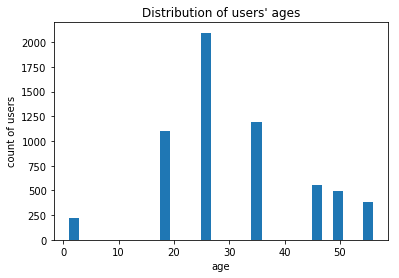

In [61]:
# how age is distributed amongst our users.
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

In [62]:
# bin our users into age groups using pandas.cut.
label = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
data['age_group']=pd.cut(data.age, range(0,81,10),right=False,labels=label)
data[['age','age_group']].drop_duplicates()[:10]

,age,age_group
0,1,0-9
1,56,50-59
2,25,20-29
4,50,50-59
5,18,10-19
9,45,40-49
20,35,30-39


In [63]:
#  compare ratings across age groups.
data.groupby('age_group').agg({'rating':[np.size,np.mean]})

rating          
               size      mean
age_group                    
0-9         27211.0  3.549520
10-19      183536.0  3.507573
20-29      395556.0  3.545235
30-39      199003.0  3.618162
40-49       83633.0  3.638062
50-59      111270.0  3.732677
60-69           NaN       NaN
70-79           NaN       NaN

In [64]:
# how the 50 most rated movies are viewed across each age group
data.set_index('movie_id',inplace=True)

In [65]:
by_age=data.loc[movie_50.index].groupby(['title','age_group'])

In [66]:
by_age.rating.mean().unstack(0).fillna(0).head()

title,2001: A Space Odyssey (1968),"Abyss, The (1989)",Airplane! (1980),Alien (1979),Aliens (1986),American Beauty (1999),Babe (1995),Back to the Future (1985),Being John Malkovich (1999),Blade Runner (1982),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Total Recall (1990),Toy Story (1995),"Usual Suspects, The (1995)",Who Framed Roger Rabbit? (1988),"Wizard of Oz, The (1939)"
age_group,,,,,,,,,,,,,,,,,,,,,
0-9,4.150000,3.909091,3.794872,4.000000,3.970588,4.434783,3.325843,4.014925,4.090909,4.093750,...,4.267327,4.184783,4.130000,4.227273,3.972973,3.441176,3.919643,4.424242,3.888889,4.050847
10-19,3.923404,3.893939,4.076667,3.922078,4.131833,4.521678,3.609929,4.079498,4.202083,4.070632,...,4.427046,4.442142,4.182594,4.058601,3.840617,3.605978,4.017857,4.680798,3.716578,3.868421
20-29,4.024712,3.614509,4.002821,4.252513,4.196382,4.330585,3.957813,3.955045,4.091703,4.350736,...,4.572695,4.390306,4.058201,4.024839,4.192351,3.651054,4.201266,4.552430,3.638607,4.197302
30-39,4.080940,3.686217,3.893805,4.200000,4.133508,4.231156,4.023684,3.975238,4.156171,4.310345,...,4.354633,4.153846,3.887273,4.129771,4.307692,3.737500,4.302600,4.390879,3.685552,4.446384
40-49,4.168478,3.683099,3.931973,4.164894,4.087591,4.151163,4.045161,4.000000,4.141026,4.275862,...,4.386831,4.137168,3.948357,4.056995,4.205128,3.800000,4.104895,4.240385,3.716312,4.429487


In [67]:
data.reset_index('movie_id', inplace=True)


In [68]:
pivoted=data.pivot_table(index=['movie_id','title'],columns='gender',values='rating',fill_value=0)
pivoted.head()

,gender,F,M
movie_id,title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


In [69]:
pivoted['diff']=pivoted.M-pivoted.F
pivoted.head()

,gender,F,M,diff
movie_id,title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665


In [70]:
pivoted.reset_index('movie_id', inplace=True)

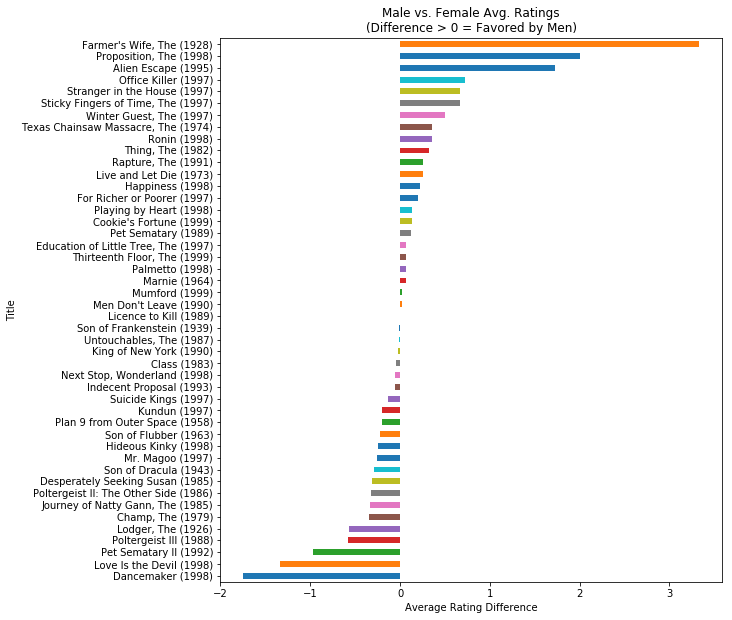

In [71]:
disagreements=pivoted[pivoted.movie_id.isin(movie_50)]['diff']
disagreements.sort_values().plot(kind='barh',figsize=[9,10])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [72]:
##### The top 5 highest ranked genre by women.
data[data.gender=='F'].groupby('genres').agg({'rating': np.mean}).sort_values(by='rating',ascending=False).head(5)


,rating
genres,
Animation|Comedy|Thriller,4.550802
Animation,4.533333
Film-Noir|Romance|Thriller,4.448718
Sci-Fi|War,4.376623
Adventure|Children's|Drama|Musical,4.355030


In [73]:
#  The top 5 highest ranked genre by men.
data[data.gender=='M'].groupby('genres').agg({'rating': np.mean}).sort_values(by='rating',ascending=False).head(5)

,rating
genres,
Sci-Fi|War,4.464789
Animation|Comedy|Thriller,4.445110
Film-Noir|Mystery,4.381536
Adventure|War,4.376633
Animation,4.353107


In [74]:
# A breakdown of a movies ratings by age, use any movie of your choice.
data[data.title=='One Flew Over the Cuckoo\'s Nest (1975)'].groupby('age').agg({'rating': np.mean}).sort_values(by='age',ascending=True).head(5)

,rating
age,
1,4.222222
18,4.457831
25,4.412371
35,4.389578
45,4.319372


In [75]:
# A function that given a user id and movie id , returns a list of user ids for
# other users that rated the movie identi_ed by the provided movie id with the same score.

def findSimilarUser(data,useid, movieid):
    score = data[data.user_id==useid][data.movie_id==movieid].rating
    users = []
    for user in data[data.movie_id==movieid].user_id:
        if(user!=useid):
            users.append(user)
    return users
        
    

In [ ]:
#For the following problems, genres were separated and a file containing that information was saved for future use. 
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users), movies)


#For the following problems, genres were separated and a file containing that information was saved for future use. 

for row in data.itertuples():
    genre_list = row[10].split("|")
    for genre_type in genre_list:
        seperated = pd.DataFrame([[row[1], row[2], row[3], row[4], row[5],
                                   row[6], row[7], row[8], row[9], genre_type]],
                                columns=data.columns) 
        with open('genre_seperated.dat', 'a') as f:
            seperated.to_csv(f, sep='\t', header=False)



In [ ]:
#import the table
data_genre_seperated = pd.read_table('genre_seperated.dat', sep='\t', header=None, names=data.columns, engine='python')
data_genre_seperated.head()